# 电信2105刘鹤大数据作业：倒闭企业数据分析

# 1、 数据集说明

这是一份来自[和鲸社区](https://www.kesci.com/mw/dataset/5e023cd12823a10036af49b4/file)开源的倒闭企业数据集，总计 6,272 条数据，大小为 2.3 M，包含 21 个字段。每条数据包含了倒闭公司名称、地址、行业领域、建立日期与倒闭日期、倒闭原因、融资情况和CEO情况等。


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('D:/BigData/EnterpriseData.csv')
data.head()

,bianh,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,...,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,...,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...,NaN,NaN,NaN,NaN,NaN
1,1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,...,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...,NaN,NaN,NaN,NaN,NaN
2,1,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,...,行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,...,现金流断裂 行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,...,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。,NaN,NaN,NaN,NaN,NaN


# 2、数据分析可视化

## 2.1 死亡公司的地区分布

### 2.1.1 柱状图

37 37


Text(0, 0.5, '公司数量')

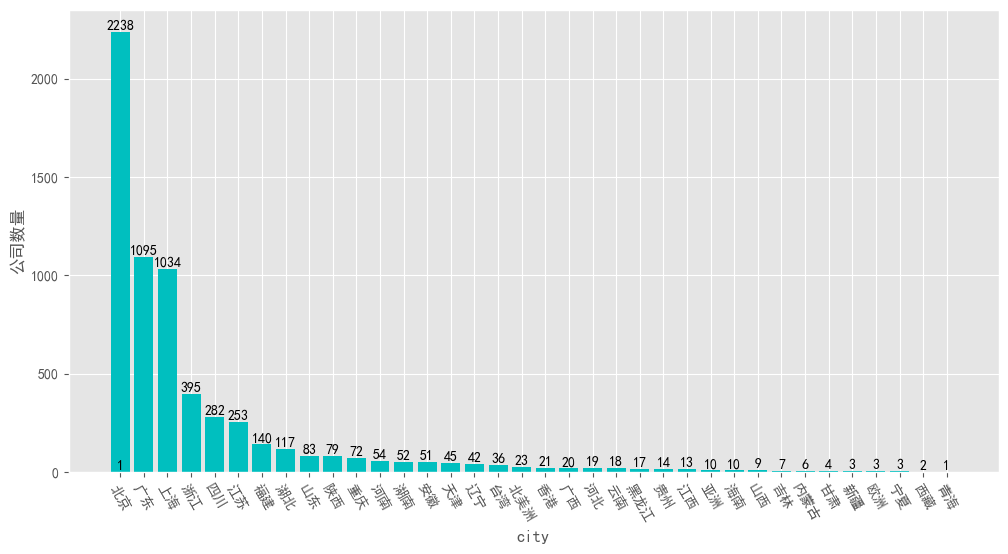

In [2]:
com_addr_x = data['com_addr'].value_counts().index.tolist()
com_addr_y = data['com_addr'].value_counts().values.tolist()
com_addr_x1 = [city_name.strip() for city_name in com_addr_x]
print(len(com_addr_x1),len(com_addr_y))
data['com_addr'].unique()
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,6))
plt.xticks(rotation=-60)
plt.bar(com_addr_x1,com_addr_y,align='center',color='c')
for a,b in zip(com_addr_x1,com_addr_y):
    plt.text(a, b+0.05, '%.0f' %b, ha='center', va= 'bottom',fontsize=10)
plt.xlabel('city')
plt.ylabel('公司数量')

### 2.1.2 中国地图分布

In [3]:
from pyecharts import options as opts
from pyecharts.charts import Map

abbr_to_fullname = { '广东': '广东省', '北京': '北京市','广西': '广西壮族自治区','福建': '福建省','江西': '江西省','云南': '云南省'
                    ,'贵州': '贵州省','湖南': '湖南省','湖北': '湖北省','四川': '四川省','重庆': '重庆市','浙江': '浙江省','安徽': '安徽省'
                    ,'上海': '上海市','江苏': '江苏省','河南': '河南省','陕西': '陕西省','山东': '山东省','山西': '山西省','天津': '天津市'
                    ,'宁夏': '宁夏回族自治区','河北': '河北省','辽宁': '辽宁省','吉林': '吉林省','内蒙古': '内蒙古自治区','黑龙江': '黑龙江省'
                    ,'甘肃': '甘肃省','新疆': '新疆维吾尔自治区','青海': '青海省','西藏': '西藏自治区','海南': '海南省','台湾': '台湾省'}


data['com_addr'] = data['com_addr'].apply(lambda x: abbr_to_fullname.get(x.strip(), x.strip())) 
s = data.groupby('com_addr').size()

c = (
Map()
    .add("死亡企业数量", [*s.items()], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="地区分布"),
        visualmap_opts=opts.VisualMapOpts(max_=1000),
    )
)
c.render_notebook()

## 2.2 倒闭企业行业领域

### 2.2.1 行业排行TOP10

In [4]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

s = data.groupby('cat').size().sort_values(ascending=False)[:10].to_dict()

c = (
    Bar()
    .add_xaxis(list(s.keys()))
    .add_yaxis("死亡企业数量", list(s.values()))
    .set_global_opts(title_opts=opts.TitleOpts(title="行业排行TOP10"))
)
c.render_notebook()

### 2.2.2 细分领域TOP20

In [25]:
s = data.groupby('se_cat').size().sort_values(ascending=False)[:20].sort_values(ascending=True).to_dict()

c = (
    Bar()
    .add_xaxis(list(s.keys()))
    .add_yaxis("死亡企业数量", list(s.values()))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="细分领域TOP20"))
)
c.render_notebook()

### 2.2.3 经济发达地区被淘汰的公司总数最多的行业分析

In [26]:
df2=data[data['com_addr'].isin(['北京','广东','上海'])]

plt.figure(1,figsize=(16,8))
sns.countplot(x='cat',order=df2['cat'].value_counts().index,hue='com_addr',
data=df2,palette='Paired')
plt.title('北、上、广各行业被淘汰的总数排名',fontsize=20)

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(loc=1)

ValueError: min() arg is an empty sequence

<Figure size 1600x800 with 0 Axes>

### 2.2.4 北上广近年来淘汰行业排名前五的各类型公司排名

ValueError: min() arg is an empty sequence

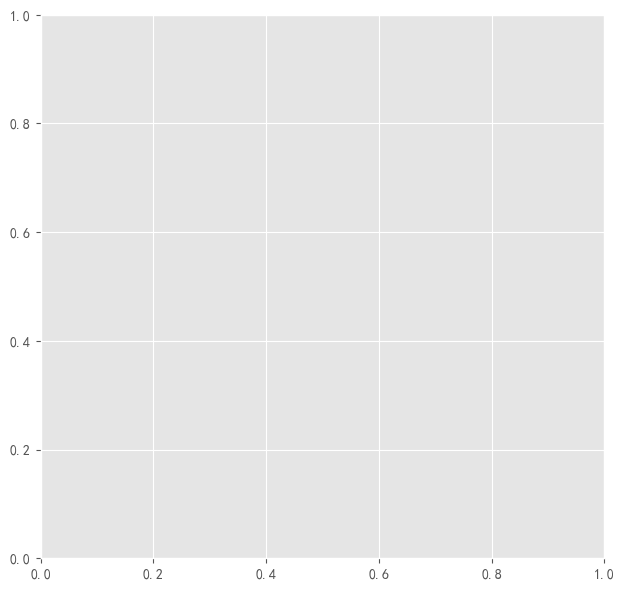

In [27]:
plt.figure(1,figsize=(16,24))
n=0
for x in ['电子商务','企业服务','本地生活','金融','社交网络']:
    n+=1
    plt.subplot(3,2,n)
    sns.countplot(y='se_cat',hue='com_addr',order=df2[df2['cat'].isin([x])]['se_cat'].value_counts().index,data=df2[df2['cat'].isin([x])],palette='Paired')
    plt.title(x,fontsize=18)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(rotation=35)
    plt.legend(loc=7)

## 2.3 倒闭企业时间分布

### 2.3.1 近年新生企业数量和死亡企业数量

In [19]:
import datetime
data['death_year'] = pd.to_datetime(data['death_data']).dt.year
data['death_month'] = pd.to_datetime(data['death_data']).dt.month

data['born_year'] = data['born_data'].apply(lambda x: x[:4])
data['death_year'] = data['death_data'].apply(lambda x: x[:4])
s1 = data.groupby('born_year').size()
s2 = data.groupby('death_year').size()
s1 = pd.DataFrame({'year': s1.index, 'born': s1.values})
s2 = pd.DataFrame({'year': s2.index, 'death': s2.values})
s = pd.merge(s1,s2, on='year', suffixes=['born', 'death'])
s = s[s['year'] > '2008']

c = (
    Bar()
    .add_xaxis( s['year'].to_list())
    .add_yaxis("新生企业数量", s['born'].to_list())
    .add_yaxis("死亡企业数量", s['death'].to_list())
    .set_global_opts(title_opts=opts.TitleOpts(title="年份分布"))
)
c.render_notebook()


### 2.3.2 近年各月份倒闭企业的数量

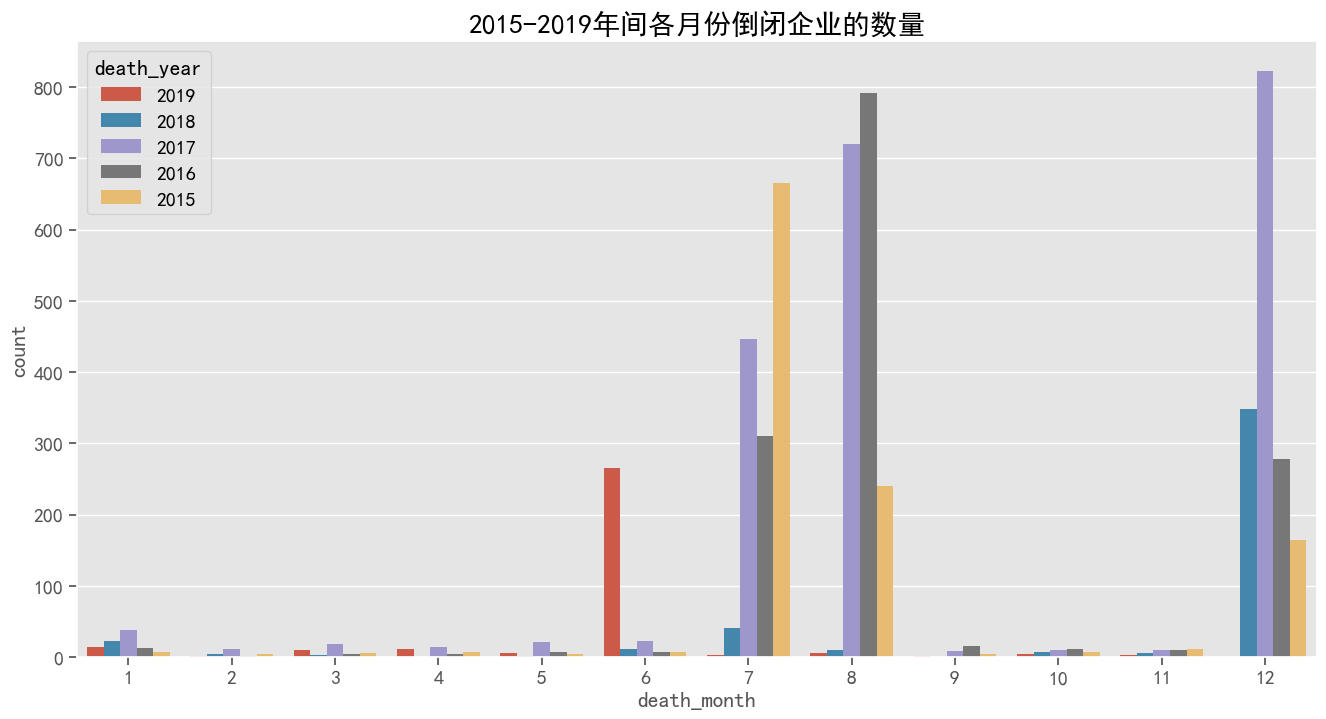

In [49]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data_m = data[data['death_year'].isin(['2015','2016','2017','2018','2019'])]
plt.figure(1,figsize=(16,8))
sns.countplot(x='death_month',hue='death_year',data=data_m)
plt.title('2015-2019年间各月份倒闭企业的数量',fontsize=20)
plt.xlabel=('month')
plt.ylabel=('amount')

### 2.3.3 倒闭公司寿命分布

d:\anaconda3\envs\bigdata\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\envs\bigdata\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\envs\bigdata\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\envs\bigdata\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\anaconda3\envs\bigdata\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 83.6% of the p

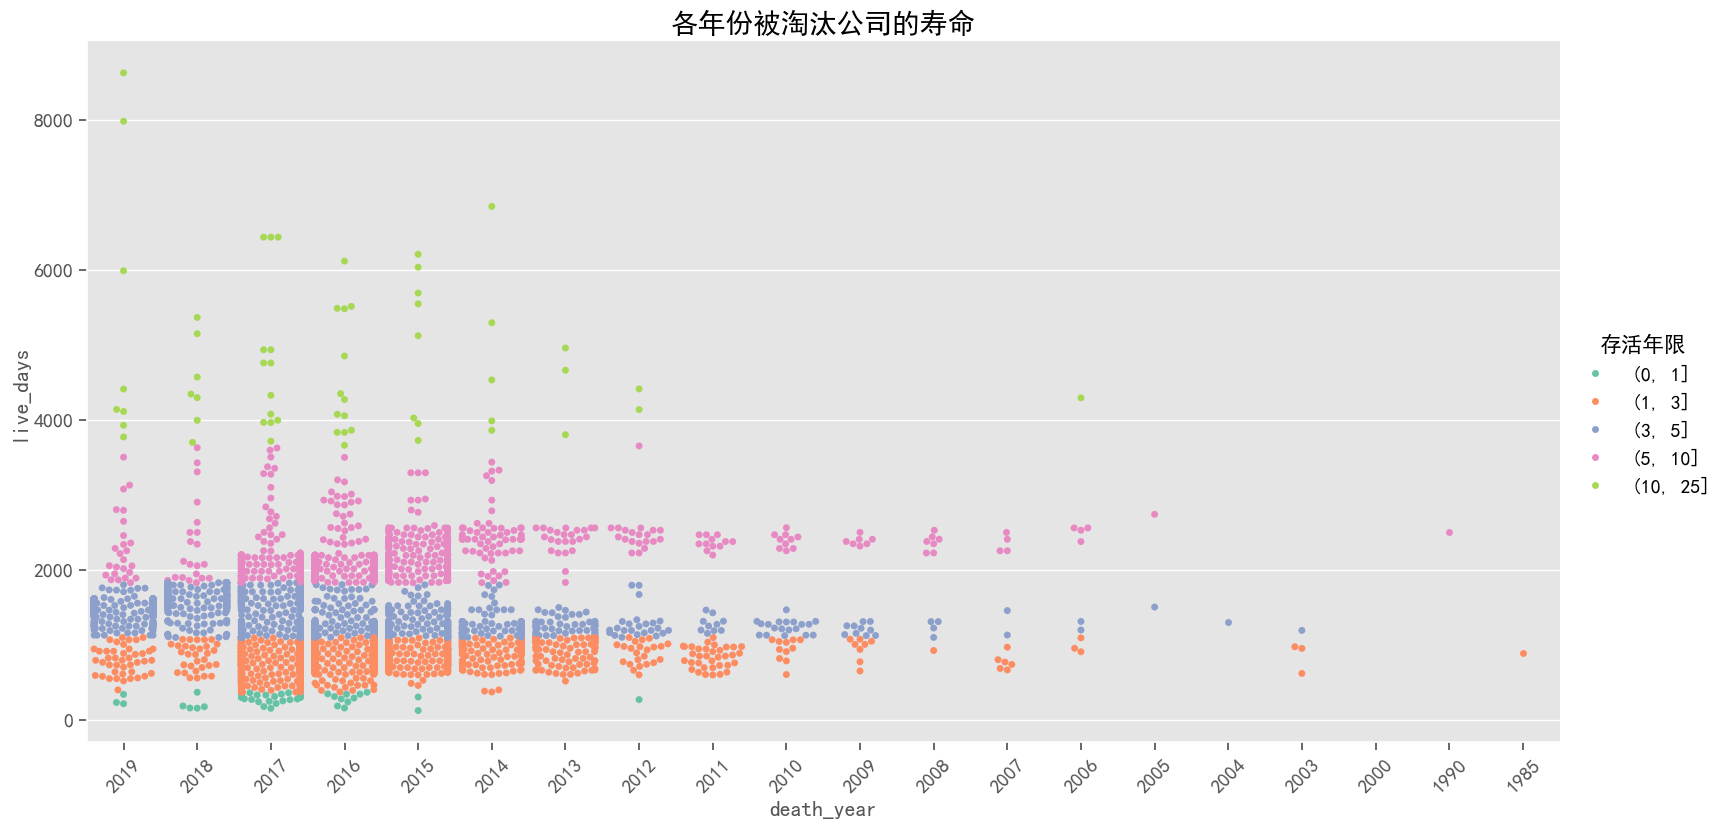

In [50]:
data['live_years']=data['live_days']/365
data['存活年限'] = pd.cut(x=data['live_years'],bins=[0,1,3,5,10,25])

sns.set_context("notebook", font_scale=1.3)
sns.catplot(x='death_year',y='live_days',hue='存活年限',kind='swarm',data=data,height=8,aspect=2,palette='Set2')
plt.title('各年份被淘汰公司的寿命',fontsize=20)

plt.xticks(rotation=45)
plt.show()

### 2.3.4 近年倒闭企业存活时长饼状图

In [7]:
def live_year(x):
    if x < 365:
        return '不到1年'
    if x < 365 * 2:
        return '1-2年'
    if x < 365 * 3:
        return '2-3年'
    if x < 365 * 4:
        return '3-4年'
    if x < 365 * 5:
        return '4-5年'
    if x < 365 * 10:
        return '5-10年'
    return '10年以上'

s = data.groupby(data['live_days'].apply(lambda x: live_year(x))).size()

from pyecharts import options as opts
from pyecharts.charts import Pie

c = (
    Pie()
    .add("", [*s.items()])
    .set_global_opts(title_opts=opts.TitleOpts(title="企业存活时长"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
c.render_notebook()

 ## 2.4 倒闭原因分析

### 2.4.1 近年倒闭企业十大死亡原因柱状图

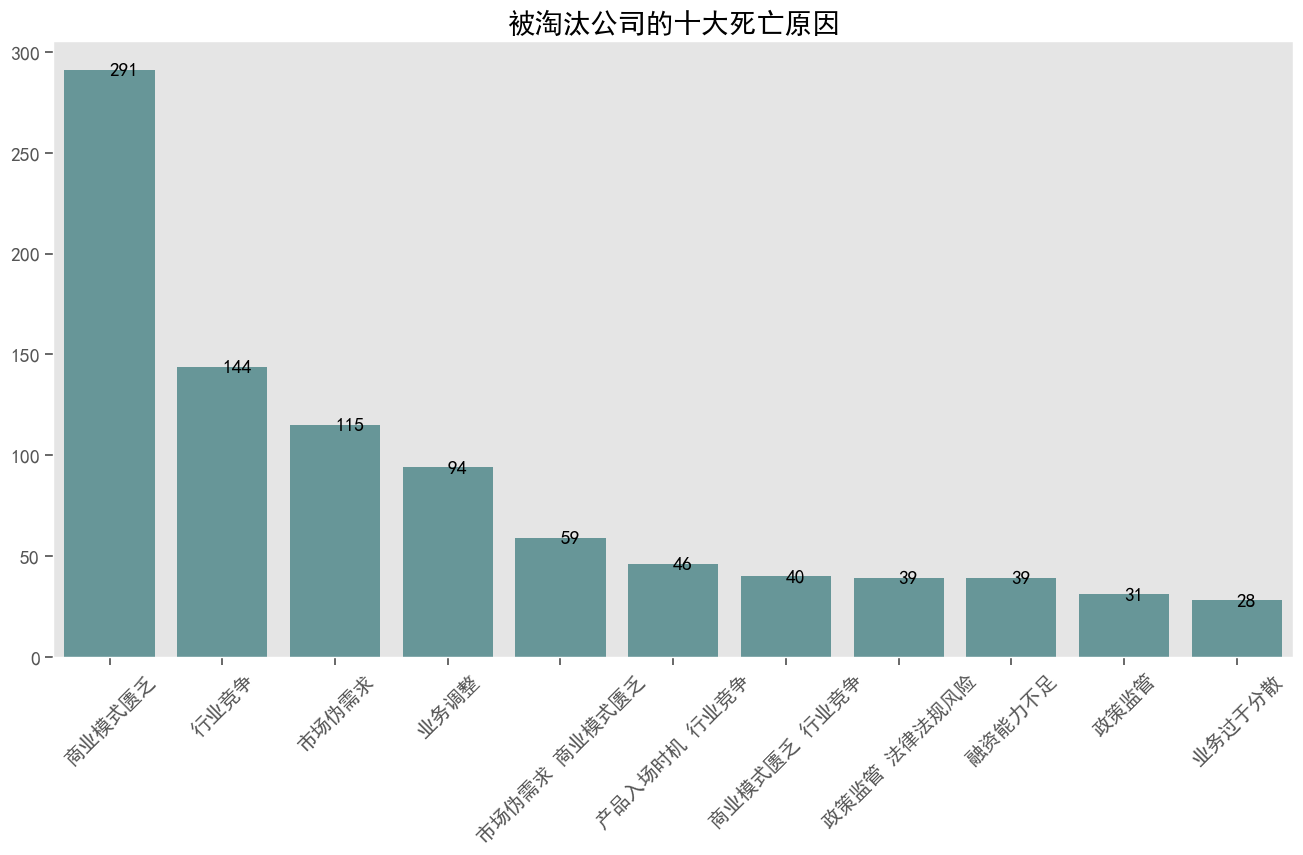

In [38]:
reason_index=data['death_reason'].value_counts()[0:11].index
reason=data.loc[data['death_reason'].isin(reason_index),'death_reason']
reason=data.loc[data['death_reason'].isin(reason_index),'death_reason']
plt.figure(1,figsize=(16,8))
sns.countplot(x=reason.values,order=reason_index,color='CadetBlue')
plt.title('被淘汰公司的十大死亡原因',fontsize=20)

plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(False)
con=list(data['death_reason'].value_counts()[0:11].values)
for y,x in enumerate(con):
    plt.text(y,x,'%s' %x,va='center',size=14)
plt.show()

### 2.4.2 倒闭原因词云

In [40]:
death_reason = {}
for row in data['death_reason'].values:
    if not pd.isnull(row):
        for name in row.split(' '):
            death_reason[name] = death_reason.get(name, 0) + 1
c = (
    WordCloud()
    .add("", [*death_reason.items()], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="倒闭原因词云"))
)
c.render_notebook()

## 2.5 投资人与CEO数据分析

### 2.5.1 投资人词云

In [51]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType

invest = {}
for row in data['invest_name'].values:
    if not pd.isnull(row):
        for name in row.split('&'):
            invest[name] = invest.get(name, 0) + 1
invest = [*invest.items()]
invest.sort(key=lambda x: x[1], reverse=True)
c = (
    WordCloud()
    .add("", invest[:150], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="投资人词云"))
)
c.render_notebook()

### 2.5.2 CEO词云

In [11]:
import jieba
ceo_per_des = {}
for row in data['ceo_per_des'].values:
    if not pd.isnull(row):
        result = jieba.lcut(row)
        for name in result:
            if len(name) == 1:
                break
            ceo_per_des[name] = ceo_per_des.get(name, 0) + 1
ceo_per_des = [*ceo_per_des.items()]
ceo_per_des.sort(key=lambda x: x[1], reverse=True)
c = (
    WordCloud()
    .add("", ceo_per_des[:100], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="ceo描述词云"))
)
c.render_notebook()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\86157\AppData\Local\Temp\jieba.cache
Loading model cost 0.831 seconds.
Prefix dict has been built successfully.


# 3、数据分析预测

## 3.1 数据读取和简单处理

In [52]:
dead_campany_data_path = "D:/BigData/EnterpriseData.csv"
dc_raw_df = pd.read_csv(dead_campany_data_path)
dc_df = dc_raw_df.drop([f"Unnamed: {x}" for x in range(16,21)], axis=1)
dc_df.head(1).T

,0
bianh,1
com_name,麦子金服
com_addr,上海
cat,金融
se_cat,借贷
com_des,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...
born_data,2015-03-01
death_data,2019-11-25
live_days,1730
financing,B轮


## 3.2 计算逐年累计死亡率与逐年留存率数据

计算每年的累计死亡数

In [53]:
dc_df[["born_data", "death_data"]].head(5)

def sub_year(x):
    return int(x[:4])

dc_select_df = dc_df[["born_data","death_data","bianh","cat","se_cat"]].assign(
    born_year=dc_df["born_data"].map(lambda x:sub_year(x)),
    death_year=dc_df["death_data"].map(lambda x:sub_year(x)),
)
dc_life_df = dc_select_df.groupby(["born_year","death_year"]).agg({"bianh":"count"}).rename({"bianh":"death_cnt"}, axis=1).reset_index()
dc_life_df = dc_life_df.assign(live_years=dc_life_df["death_year"] - dc_life_df["born_year"])
dc_life_df = dc_life_df[dc_life_df["live_years"] > 0]
dc_life_df.head()

,born_year,death_year,death_cnt,live_years
0,1983,1985,1,2
1,1984,1990,1,6
2,1994,2006,1,12
3,1995,2014,1,19
4,1996,2019,1,23


企业留存年数的描述统计，平均值为6.89年，中位数为6年

In [56]:
pd.DataFrame(dc_life_df["live_years"].describe().round(2))

,live_years
count,133.00
mean,6.89
std,4.70
min,1.00
25%,3.00
50%,6.00
75%,10.00
max,23.00


生成分年份的逐年累计死亡率数据，第一列为当年的创建企业，后面为到每一年的累计死亡率
计算方式：某年创办企业的第n年死亡率 = 某年创办的企业到第n年的累计死亡企业数/某年创办的总企业数
留存率 = 1 - 死亡率

In [54]:
life_cusum_df = dc_life_df.groupby(["born_year"]).expanding().agg({"death_cnt":"sum"}).rename({"death_cnt":"death_cusum"}, axis=1).reset_index("born_year")[["death_cusum"]]
life_sum_df = dc_life_df.groupby(["born_year"]).agg({"death_cnt":"sum"}).rename({"death_cnt":"death_total"},axis=1).reset_index()[["born_year","death_total"]]
dc_death_df = pd.merge(pd.concat([dc_life_df,life_cusum_df], axis=1),life_sum_df,on="born_year")

dc_death_rate_df = dc_death_df.assign(
    death_rate = dc_death_df["death_cusum"]/dc_death_df["death_total"],
    retention_rate = 1 - (dc_death_df["death_cusum"]/dc_death_df["death_total"])
)

born_table = dc_life_df.groupby("born_year").agg({"death_cnt":"sum"}).rename({"death_cnt":"born_cnt"},axis=1)

def get_rate_table(dc_death_rate_df, value_column_name, fill_value):
    death_rate_table = dc_death_rate_df.pivot(index="born_year",columns="live_years",values=value_column_name)
    death_rate_table = death_rate_table.fillna(method="ffill", axis=1).fillna(fill_value).round(2)
    death_rate_table = pd.concat([born_table,death_rate_table],axis=1)
    return death_rate_table

death_rate_table = get_rate_table(dc_death_rate_df, "death_rate", 0)
death_rate_table

C:\Users\86157\AppData\Local\Temp\ipykernel_19780\1109860016.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  death_rate_table = death_rate_table.fillna(method="ffill", axis=1).fillna(fill_value).round(2)


,born_cnt,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,22,23
born_year,,,,,,,,,,,,,,,,,,,,
1983,1,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0
1984,1,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0
1994,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0
1995,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,1.0,1.0
1996,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0
1997,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,1.0
1998,3,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.33,1.0,1.0,1.0,1.0
1999,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.0,1.0,1.0
2000,15,0.00,0.00,0.13,0.13,0.13,0.40,0.40,0.40,0.40,0.40,0.40,0.47,0.60,0.67,0.80,1.0,1.0,1.0,1.0


In [55]:
retetion_rate_table = get_rate_table(dc_death_rate_df, "retention_rate", 1)
retetion_rate_table

C:\Users\86157\AppData\Local\Temp\ipykernel_19780\1109860016.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  death_rate_table = death_rate_table.fillna(method="ffill", axis=1).fillna(fill_value).round(2)


,born_cnt,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,22,23
born_year,,,,,,,,,,,,,,,,,,,,
1983,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1984,1,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1994,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1995,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.0,0.0,0.0
1996,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,0.0
1997,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.0,0.0
1998,3,1.00,1.00,1.00,1.00,1.00,1.00,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.0,0.0,0.0,0.0
1999,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0
2000,15,1.00,1.00,0.87,0.87,0.87,0.60,0.60,0.60,0.60,0.60,0.60,0.53,0.40,0.33,0.20,0.0,0.0,0.0,0.0


## 3.3 根据数据预测

根据数据分析，近年倒闭企业存活的年数平均值为6.89，中位数为6年，并生产了分年份的逐年累计死亡率和逐年留存率数据表。企业可以参考此数据，在创办和运营时做出更好的选择